# Machine Learning

### <font color='orange'>Universidad Autónoma de Yucatán</font> _Facultad de Matemáticas_

**Teacher:** Dr. Victor Uc Cetina <[victoruccetina@gmail.com](mailto:victoruccetina@gmail.com)>

**Student:** Ing. Dayan Bravo Fraga <[dayan3847@gmail.com](mailto:dayan3847@gmail.com)>

# Cliff Walking

<img src="../2_4_q_learning_tables/img/cliff_walking.png" width="500"></img>

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
from dayan3847.reinforcement_learning.cliff_walking.agent import Environment, AgentQLearning, AgentQLearningGaussian

In [31]:
np.random.seed(0)

In [32]:
environment: Environment = Environment()

In [33]:
agent: AgentQLearningGaussian = AgentQLearningGaussian(environment,
                                                       a=.1,
                                                       s2=.1,
                                                       init_weights_random=False,
                                                       )

In [34]:
class Trainner:
    def __init__(
            self,
            a: AgentQLearning,
            experiments_count: int,
            episodes_count: int,
    ):
        self.agent: AgentQLearning = a
        self.env: Environment = a.env
        self.experiments_status: tuple[int, int] = 0, experiments_count  # Experiment 0 of 50
        self.episodes_status: tuple[int, int] = 0, episodes_count  # Episode 0 of 500
        # rewards promedio(de todos los experimentos) por episodio
        self.rewards_sum: np.array = np.zeros(self.episodes_status[1])
        # cantidad de veces que llego al final
        self.success: np.array = np.zeros(self.episodes_status[1])

    def get_title(self):
        return 'Experiment: {}/{} Episode: {}/{}'.format(
            self.experiments_status[0] + 1,
            self.experiments_status[1],
            self.episodes_status[0] + 1,
            self.episodes_status[1]
        )

    def get_rewards_average(self) -> np.array:
        return self.rewards_sum / (self.experiments_status[0] + 1)

    def train(self):
        for i_exp in range(self.experiments_status[1]):
            self.experiments_status = i_exp, self.experiments_status[1]
            self.agent.reset_knowledge()
            for i_epi in range(self.episodes_status[1]):
                self.episodes_status = i_epi, self.episodes_status[1]
                print(self.get_title())
                episode_end: bool = False
                while not episode_end:
                    reward, episode_end = self.agent.run_step()
                    self.rewards_sum[i_epi] += reward
                    if episode_end and reward > 0:
                        self.success[i_epi] += 1


trainner = Trainner(agent,
                    experiments_count=1,
                    episodes_count=1000,
                    )

In [35]:
#@title Train
trainner.train()

Experiment: 1/1 Episode: 1/1000
Experiment: 1/1 Episode: 2/1000
Experiment: 1/1 Episode: 3/1000
Experiment: 1/1 Episode: 4/1000
Experiment: 1/1 Episode: 5/1000
Experiment: 1/1 Episode: 6/1000
Experiment: 1/1 Episode: 7/1000
Experiment: 1/1 Episode: 8/1000
Experiment: 1/1 Episode: 9/1000
Experiment: 1/1 Episode: 10/1000
Experiment: 1/1 Episode: 11/1000
Experiment: 1/1 Episode: 12/1000
Experiment: 1/1 Episode: 13/1000
Experiment: 1/1 Episode: 14/1000
Experiment: 1/1 Episode: 15/1000
Experiment: 1/1 Episode: 16/1000
Experiment: 1/1 Episode: 17/1000
Experiment: 1/1 Episode: 18/1000
Experiment: 1/1 Episode: 19/1000
Experiment: 1/1 Episode: 20/1000
Experiment: 1/1 Episode: 21/1000
Experiment: 1/1 Episode: 22/1000
Experiment: 1/1 Episode: 23/1000
Experiment: 1/1 Episode: 24/1000
Experiment: 1/1 Episode: 25/1000
Experiment: 1/1 Episode: 26/1000
Experiment: 1/1 Episode: 27/1000
Experiment: 1/1 Episode: 28/1000
Experiment: 1/1 Episode: 29/1000
Experiment: 1/1 Episode: 30/1000
Experiment: 1/1 Epi

In [21]:
#@title Save Knowledge
#agent.save_knowledge()

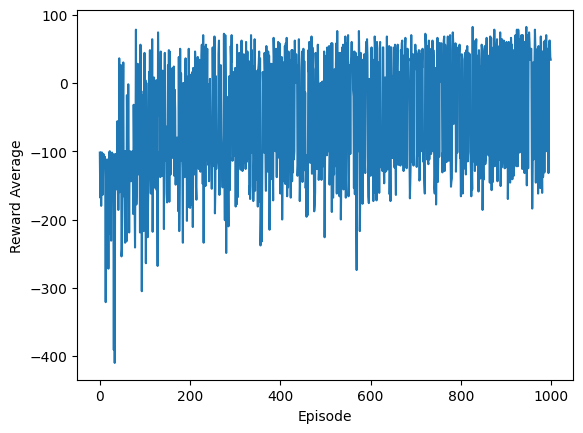

In [36]:
#@title Plot Rewards
def plot_rewards_average():
    plt.plot(trainner.get_rewards_average(), label='Reward Average')
    plt.xlabel('Episode')
    plt.ylabel('Reward Average')
    plt.show()


plot_rewards_average()

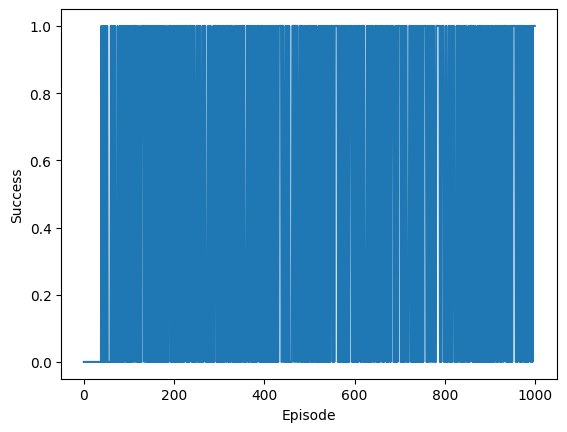

In [37]:
#@title Plot Success
def plot_success():
    plt.plot(trainner.success, label='Success')
    plt.xlabel('Episode')
    plt.ylabel('Success')
    plt.show()


plot_success()

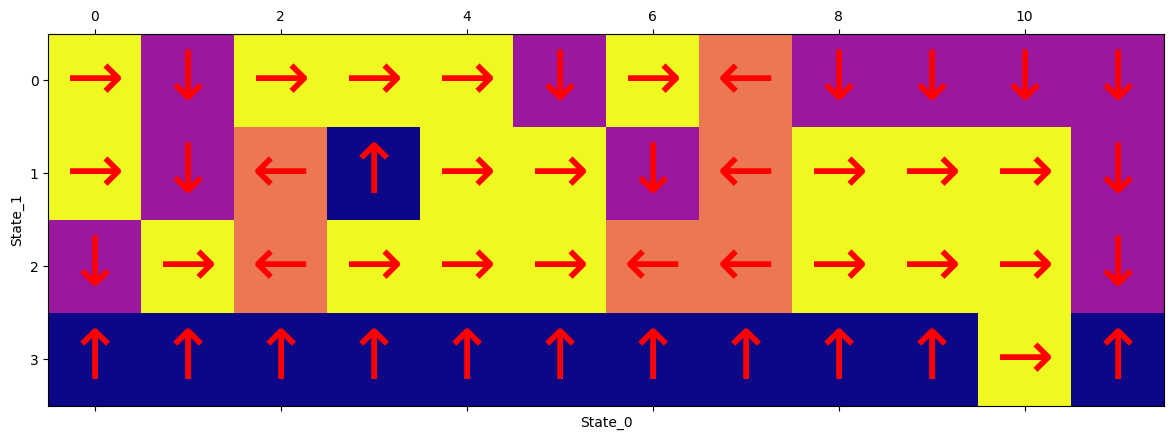

In [38]:
#@title Plot Best Action
def plot_best_action():
    best_actions = agent.get_best_actions_for_all_states()
    plt.matshow(best_actions, label='Best Action')
    m, n = best_actions.shape
    for i in range(m):
        for j in range(n):
            _cell = best_actions[i, j]
            cell = '↑' if _cell == 0 \
                else '↓' if _cell == 1 \
                else '←' if _cell == 2 \
                else '→' if _cell == 3 \
                else 'X'
            plt.text(j, i, cell, ha='center', va='center', color='red', fontsize=50)

    plt.xlabel('State_0')
    plt.ylabel('State_1')
    plt.show()


plot_best_action()

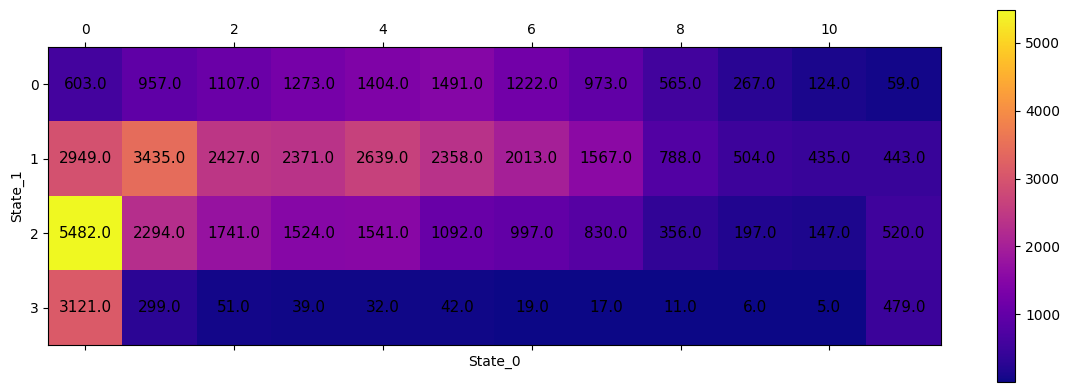

In [39]:
#@title Plot Board Incidence
def plot_board_incidence():
    plt.matshow(trainner.env.board_incidence, label='Board Incidence')
    m, n = trainner.env.board_incidence.shape
    for i in range(m):
        for j in range(n):
            plt.text(j, i, trainner.env.board_incidence[i, j], ha='center', va='center', fontsize=11)

    plt.xlabel('State_0')
    plt.ylabel('State_1')
    plt.colorbar()
    plt.set_cmap('plasma')
    plt.show()


plot_board_incidence()

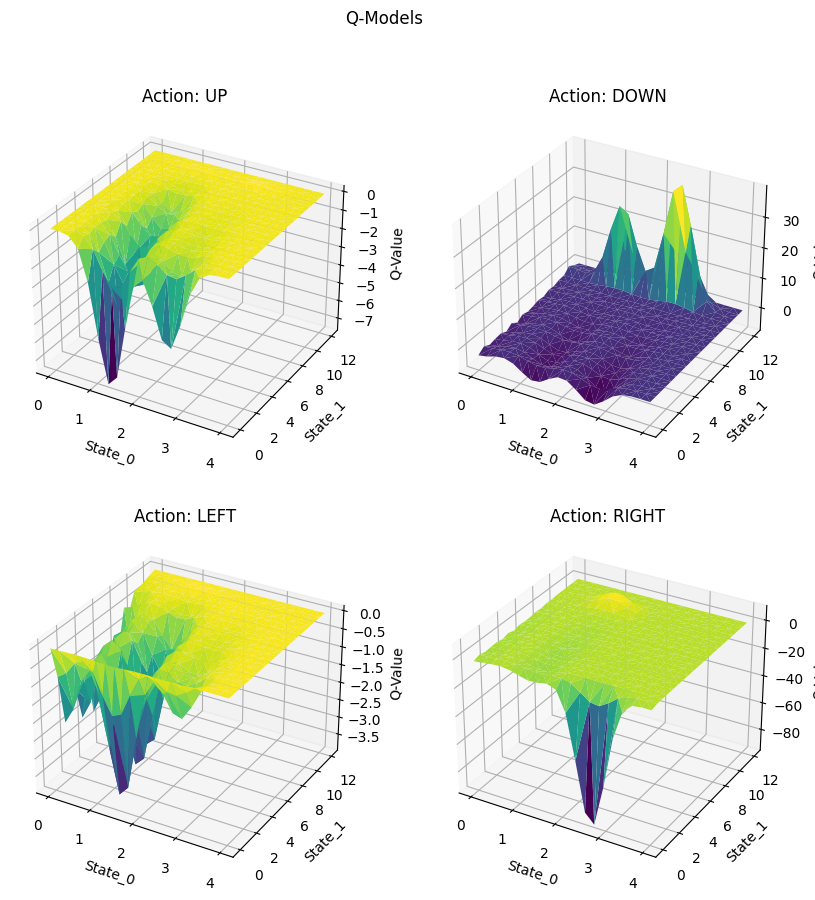

In [40]:
#@title Plot the Q-Models
def plot_q_table_histograms():
    fig = plt.figure(figsize=(10, 10))
    fig.suptitle('Q-Models')

    # UP
    ax = fig.add_subplot(221, projection='3d')
    ax.set_title('Action: UP')
    ax.set_xlabel('State_0')
    ax.set_ylabel('State_1')
    ax.set_zlabel('Q-Value')
    _model = agent.q_gaussian_models[0]
    _x, _y = _model.data_to_plot_matplotlib()
    ax.plot_trisurf(_x[0], _x[1], _y, cmap='viridis', edgecolor='none')

    # DOWN
    ax = fig.add_subplot(222, projection='3d')
    ax.set_title('Action: DOWN')
    ax.set_xlabel('State_0')
    ax.set_ylabel('State_1')
    ax.set_zlabel('Q-Value')
    _model = agent.q_gaussian_models[1]
    _x, _y = _model.data_to_plot_matplotlib()
    ax.plot_trisurf(_x[0], _x[1], _y, cmap='viridis', edgecolor='none')

    # LEFT
    ax = fig.add_subplot(223, projection='3d')
    ax.set_title('Action: LEFT')
    ax.set_xlabel('State_0')
    ax.set_ylabel('State_1')
    ax.set_zlabel('Q-Value')
    _model = agent.q_gaussian_models[2]
    _x, _y = _model.data_to_plot_matplotlib()
    ax.plot_trisurf(_x[0], _x[1], _y, cmap='viridis', edgecolor='none')

    # RIGHT
    ax = fig.add_subplot(224, projection='3d')
    ax.set_title('Action: RIGHT')
    ax.set_xlabel('State_0')
    ax.set_ylabel('State_1')
    ax.set_zlabel('Q-Value')
    _model = agent.q_gaussian_models[3]
    _x, _y = _model.data_to_plot_matplotlib()
    ax.plot_trisurf(_x[0], _x[1], _y, cmap='viridis', edgecolor='none')

    # show
    plt.show()


plot_q_table_histograms()